In [19]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg

Visualizing example dataset for PCA.



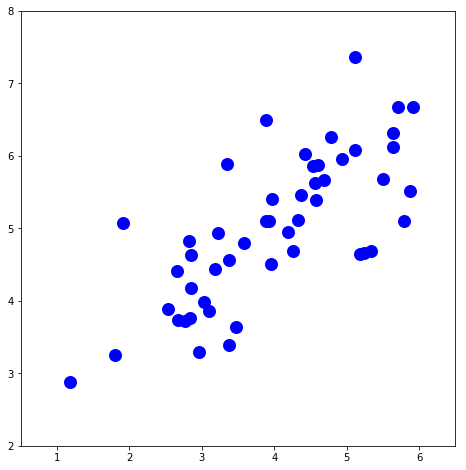

In [16]:
## ================== Part 1: Load Example Dataset  ===================
#  We start this exercise by using a small dataset that is easily to
#  visualize
#
print('Visualizing example dataset for PCA.\n');

#  The following command loads the dataset. You should now have the 
#  variable X in your environment
mat = scipy.io.loadmat('data/ex7/ex7data1.mat')
X = np.array(mat["X"])

#  Visualize the example dataset
plt.close()

plt.figure(figsize=(12,8))
#plt.ion()
# kept the scatter() (vs. the plot()) version 
#  because scatter() makes properly circular markers
# plt.plot(X[:, 0], X[:, 1], 'o', markersize=9, markeredgewidth=1, markeredgecolor='b', markerfacecolor='None')
#plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors='b')
plt.plot(X[:,0], X[:,1], 'bo',markersize=10, mew=3)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')
plt.show(block=False)

In [21]:
def featureNormalize(X):
    #FEATURENORMALIZE Normalizes the features in X 
    #   FEATURENORMALIZE(X) returns a normalized version of X where
    #   the mean value of each feature is 0 and the standard deviation
    #   is 1. This is often a good preprocessing step to do when
    #   working with learning algorithms.

    mu = np.mean(X, axis=0)
    X_norm = X - mu

    # note that a difference here with the matlab/octave way of handling
    # stddev produces different results further down the pipeline
    # see:
    #   http://stackoverflow.com/q/27600207/583834
    #   https://www.gnu.org/software/octave/doc/v4.0.3/Descriptive-Statistics.html#XREFstd
    # python's np.std() outputs:
    #   [ 1.16126017  1.01312201]
    # octave's std() outputs:
    #   [1.17304991480488,  1.02340777859473]
    # code below uses python np.std(..., ddof=1) following
    #   http://stackoverflow.com/a/27600240/583834
    sigma = np.std(X_norm, axis=0, ddof=1)

    X_norm = X_norm/sigma

    return X_norm, mu, sigma
def pca(X):
    #PCA Run principal component analysis on the dataset X
    #   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
    #   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
    #

    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should first compute the covariance matrix. Then, you
    #               should use the "svd" function to compute the eigenvectors
    #               and eigenvalues of the covariance matrix. 
    #
    # Note: When computing the covariance matrix, remember to divide by m (the
    #       number of examples).
    #

    # compute the covariance matrix
    sigma = (1.0/m) * (X.T).dot(X)

    # compute the eigenvectors (U) and S
    # from: 
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd
    # http://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.diagsvd.html#scipy.linalg.diagsvd
    U, S, Vh = linalg.svd(sigma)
    S = linalg.diagsvd(S, len(S), len(S))

    # =========================================================================

    return U, S
def drawLine(p1, p2, **kwargs):
#DRAWLINE Draws a line from point p1 to point p2
#   DRAWLINE(p1, p2) Draws a line from point p1 to point p2 and holds the
#   current figure

    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

Running PCA on example dataset.



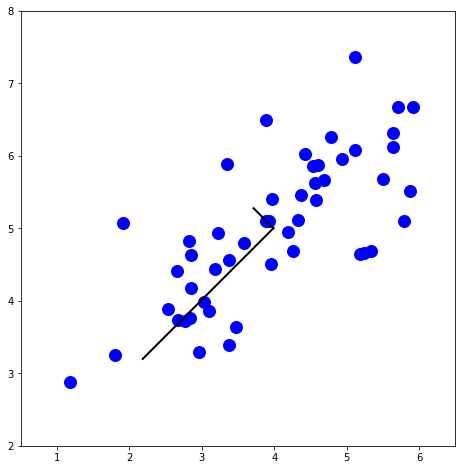

Top eigenvector: 

 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


In [25]:
## =============== Part 2: Principal Component Analysis ===============
#  You should now implement PCA, a dimension reduction technique. You
#  should complete the code in pca.m
#
print('Running PCA on example dataset.\n');

#  Before running PCA, it is important to first normalize X
X_norm, mu, _ = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Compute mu, the mean of the each feature

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
plt.close()
plt.figure(figsize=(12,8))
plt.plot(X[:,0], X[:,1], 'bo',markersize=10, mew=3)
plt.axis([0.5, 6.5, 2, 8])
plt.gca().set_aspect('equal', adjustable='box')

drawLine(mu, mu + 1.5 * S[0,0] * U[:,0].T, c='k', linewidth=2)
drawLine(mu, mu + 1.5 * S[1,1] * U[:,1].T, c='k', linewidth=2)
plt.show()

print('Top eigenvector: \n')
print(' U(:,1) = {:f} {:f} \n'.format(U[0,0], U[1,0]))
print('(you should expect to see -0.707107 -0.707107)')


In [26]:
def recoverData(Z, U, K):
    #RECOVERDATA Recovers an approximation of the original data when using the 
    #projected data
    #   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
    #   original data that has been reduced to K dimensions. It returns the
    #   approximate reconstruction in X_rec.
    #

    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the approximation of the data by projecting back
    #               onto the original space using the top K eigenvectors in U.
    #
    #               For the i-th example Z(i,:), the (approximate)
    #               recovered data for dimension j is given as follows:
    #                    v = Z(i, :)';
    #                    recovered_j = v' * U(j, 1:K)';
    #
    #               Notice that U(j, 1:K) is a row vector.
    #               

    # get U_reduce for only the desired K
    U_reduce = U[:,:K]

    # recover data
    X_rec = Z.dot(U_reduce.T)

    # =============================================================

    return X_rec
def projectData(X, U, K):
    #PROJECTDATA Computes the reduced data representation when projecting only 
    #on to the top k eigenvectors
    #   Z = projectData(X, U, K) computes the projection of 
    #   the normalized inputs X into the reduced dimensional space spanned by
    #   the first K columns of U. It returns the projected examples in Z.
    #

    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the projection of the data using only the top K 
    #               eigenvectors in U (first K columns). 
    #               For the i-th example X(i,:), the projection on to the k-th 
    #               eigenvector is given as follows:
    #                    x = X(i, :)';
    #                    projection_k = x' * U(:, k);
    #

    # get U_reduce for only the desired K
    U_reduce = U[:,:K]

    # get Z - the projections from X onto the space defined by U_reduce
    #	note that this vectorized version performs the projection the instructions
    # 	above but in one operation
    Z = X.dot(U_reduce)

    # =============================================================

    return Z

Dimension reduction on example dataset.

Projection of the first example: [1.48127391]

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



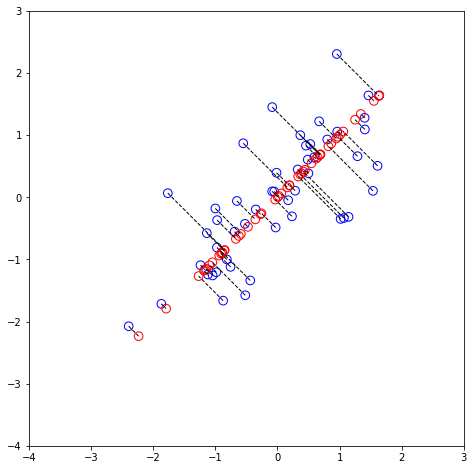

In [31]:
## =================== Part 3: Dimension Reduction ===================
#  You should now implement the projection step to map the data onto the 
#  first k eigenvectors. The code will then plot the data in this reduced 
#  dimensional space.  This will show you what the data looks like when 
#  using only the corresponding eigenvectors to reconstruct it.
#
#  You should complete the code in projectData.m
#
print('Dimension reduction on example dataset.\n');

#  Plot the normalized dataset (returned from pca)
plt.close()
plt.figure(figsize=(12,8))
plt.scatter(X_norm[:,0], X_norm[:,1], s=75, facecolors='none', edgecolors='b')
plt.axis([-4, 3, -4, 3])
plt.gca().set_aspect('equal', adjustable='box')


#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:s}\n'.format(str(Z[0])))
print('(this value should be about 1.481274)\n')

X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: {:f} {:f}\n'.format(X_rec[0, 0], X_rec[0, 1]))
print('(this value should be about  -1.047419 -1.047419)\n')

#  Draw lines connecting the projected points to the original points
plt.scatter(X_rec[:, 0], X_rec[:, 1], s=75, facecolors='none', edgecolors='r')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i,:], X_rec[i,:], linestyle='--', color='k', linewidth=1)

plt.show(block=False)

In [56]:
import math
def displayData(X, example_width=None):
    #DISPLAYDATA Display 2D data in a nice grid
    #   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
    #   stored in X in a nice grid. It returns the figure handle h and the 
    #   displayed array if requested.

    # using plt.ion() instead of the commented section below
    # # closes previously opened figure. preventing a
    # # warning after opening too many figures
    # plt.close()

    # # creates new figure 
    # plt.figure()

    # turns 1D X array into 2D
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))

    # Set example_width automatically if not passed in
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))

    # Gray Image
   
    plt.set_cmap("gray")

    # Compute rows, cols
    m, n = X.shape
    example_height = n // example_width

    # Compute number of items to display
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))

    # Between images padding
    pad = 1

    # Setup blank display
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

    # Copy each example into a patch on the display array
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
        
            # Copy the patch
            
            # Get the max value of the patch to normalize all examples
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))

            # Basic (vs. advanced) indexing/slicing is necessary so that we look can assign
            #   values directly to display_array and not to a copy of its subarray.
            #   from stackoverflow.com/a/7960811/583834 and 
            #   bytes.com/topic/python/answers/759181-help-slicing-replacing-matrix-sections
            # Also notice the order="F" parameter on the reshape call - this is because python's 
            #   default reshape function uses "C-like index order, with the last axis index 
            #   changing fastest, back to the first axis index changing slowest" i.e. 
            #   it first fills out the first row/the first index, then the second row, etc. 
            #   matlab uses "Fortran-like index order, with the first index changing fastest, 
            #   and the last index changing slowest" i.e. it first fills out the first column, 
            #   then the second column, etc. This latter behaviour is what we want.
            #   Alternatively, we can keep the deault order="C" and then transpose the result
            #   from the reshape call.
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
    
        if curr_ex > m:
            break

    # Display Image
    h = plt.imshow(display_array, vmin=-1, vmax=1)

    # Do not show axis
    plt.axis('off')

    #plt.show(block=False)

    return h, display_array


Loading face dataset.



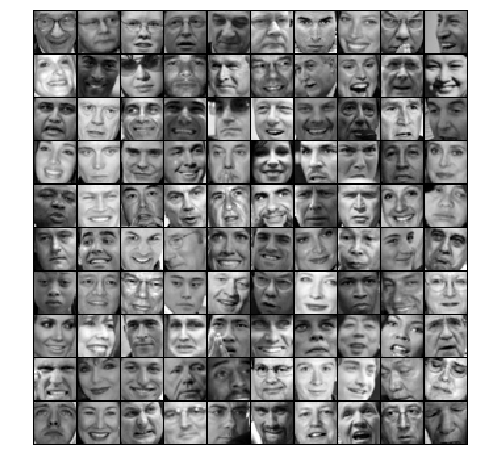

In [57]:
## =============== Part 4: Loading and Visualizing Face Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  The following code will load the dataset into your environment
#
print('Loading face dataset.\n');

#  Load Face dataset
mat = scipy.io.loadmat('data/ex7/ex7faces.mat')
X = np.array(mat["X"])

#  Display the first 100 faces in the dataset
plt.close()
plt.figure(figsize=(12,8))
_,_=displayData(X[:100, :])


Running PCA on face dataset.
(this mght take a minute or two ...)



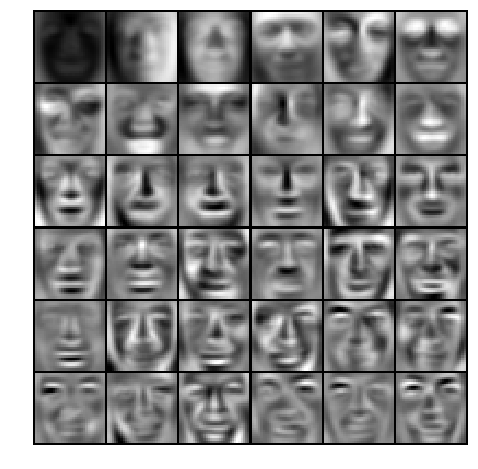

In [58]:
## =========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.
#
print('Running PCA on face dataset.\n(this mght take a minute or two ...)\n')

#  Before running PCA, it is important to first normalize X by subtracting 
#  the mean value from each feature
X_norm, _, _ = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
plt.close()
plt.figure(figsize=(12,8))
_,_=displayData(U[:, :36].T)


In [53]:
## ============= Part 6: Dimension Reduction for Faces =================
#  Project images to the eigen space using the top k eigenvectors 
#  If you are applying a machine learning algorithm 
print('Dimension reduction for face dataset.\n');

K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a size of: ')
print('{:d} {:d}'.format(Z.shape[0], Z.shape[1]))


Dimension reduction for face dataset.

The projected data Z has a size of: 
5000 100


Visualizing the projected (reduced dimension) faces.



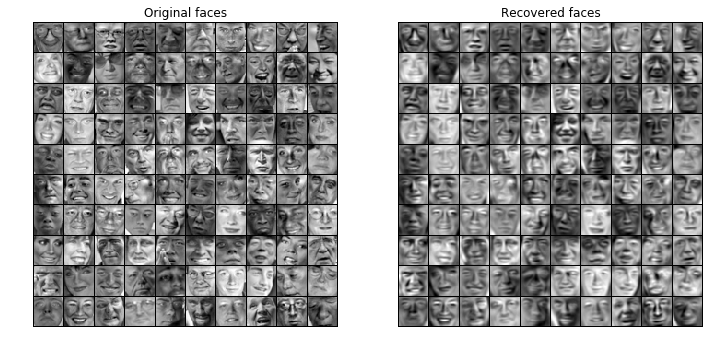

In [60]:
## ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#  Project images to the eigen space using the top K eigen vectors and 
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed

print('Visualizing the projected (reduced dimension) faces.\n');

K = 100;
X_rec  = recoverData(Z, U, K)

# Display normalized data
plt.close()
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
displayData(X_norm[:100,:])
plt.title('Original faces')
plt.gca().set_aspect('equal', adjustable='box')

# Display reconstructed data from only k eigenfaces
plt.subplot(1, 2, 2)
displayData(X_rec[:100,:])
plt.title('Recovered faces')
plt.gca().set_aspect('equal', adjustable='box')
plt.show(block=False)

In [81]:
##copied from Clustering assigment
def kMeansInitCentroids(X, K):
    centroids = np.zeros((K, X.shape[1]))
    return centroids
def findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1), dtype=np.int8)
    m = X.shape[0]
    # for every training example
    for i in range(m):
        # for every centroid
        for j in range(K):
            # compute the euclidean distance between the example and the centroid
            difference = X[i,:]-centroids[j,:]
            distance = np.power(np.sqrt( difference.dot(difference.T) ), 2)
            if j == 0 or distance < min_distance:
                min_distance = distance
                min_centroid = j
        # assign centroid for this example to one corresponding to the min_distance 
        idx[i]= min_centroid
    return idx

def computeCentroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for j in range(K):
        centroid_examples = np.nonzero(idx == j)[0]
        centroids[j,:] = np.mean( X[centroid_examples,:], axis=0 )
    return centroids

def runkMeans(X, initial_centroids, max_iters):
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))
    # Run K-Means
    for i in range(max_iters):
        # Output progress
        print('K-Means iteration {:d}/{:d}...'.format(i+1, max_iters))
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

In [74]:
## === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.

# Re-load the image from the previous exercise and run K-Means on it
# For this to work, you need to complete the K-Means assignment first

# A = double(imread('bird_small.png'));
mat = scipy.io.loadmat('data/ex7/bird_small.mat')
A = mat["A"]

# from ex7.py, part 4
A = A / 255.0
img_size = A.shape
X = A.reshape(img_size[0] * img_size[1], 3, order='F').copy()
K = 16 
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)

K-Means iteration 1/10...


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


In [185]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
def hsv(n=63):
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1), np.ones( ((n+1), 2) ) ]) )
#     R = np.linspace(-3,42)
#     norm= plt.Normalize(-3,42)
#     color=plt.cm.hsv(norm(R))
#     color=plt.cm.hsv(np.column_stack([ np.linspace(0, 1, n+1), np.ones( ((n+1), 2) ) ]))
#     return color
import random

def mycolors(n=63):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append((r,g,b)) 
    return ret
def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
    #index assignments in idx have the same color
    #   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
    #   with the same index assignments in idx have the same color
    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])
    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)
    return

[(209, 105, 108), (225, 121, 124), (241, 137, 140), (1, 153, 156), (17, 169, 172), (33, 185, 188), (49, 201, 204), (65, 217, 220), (81, 233, 236), (97, 249, 252), (113, 9, 12), (129, 25, 28), (145, 41, 44), (161, 57, 60), (177, 73, 76), (193, 89, 92)]


ValueError: c of shape (16,) not acceptable as a color sequence for x with size 1000, y with size 1000

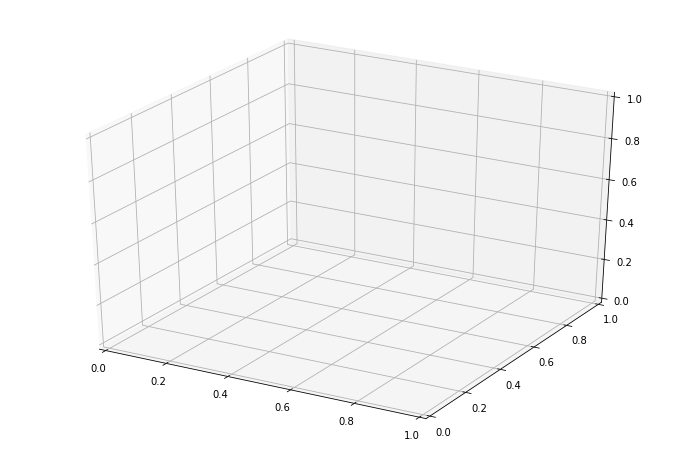

In [186]:
#  Sample 1000 random indexes (since working with all the data is
#  too expensive. If you have a fast computer, you may increase this.
#  use flatten(). otherwise, Z[sel, :] yields array w shape [1000,1,2]
sel = np.floor(np.random.rand(1000, 1) * X.shape[0]).astype(int).flatten()

#  Setup Color Palette
palette = mycolors(K)
colors = np.array([palette[int(i)] for i in idx[sel]])
print(palette)
#  Visualize the data and centroid memberships in 3D

plt.close()
fig1 = plt.figure(1,figsize=(12,8))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(X[sel, 0], X[sel, 1], X[sel, 2], c=np.random.rand(K))
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show(block=False)

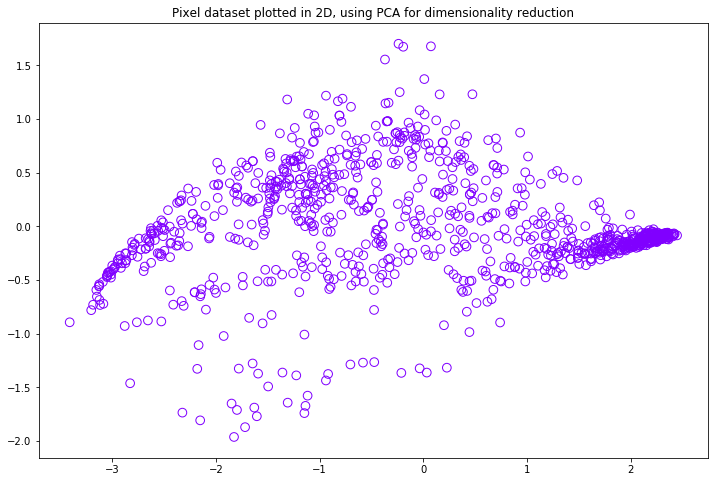

In [138]:
## === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
# Use PCA to project this cloud to 2D for visualization

# Subtract the mean to use PCA
X_norm, _, _ = featureNormalize(X)

palette = hsv(2)
# PCA and project the data to 2D
U, S = pca(X_norm)
Z = projectData(X_norm, U, 2)
plt.close()
# Plot in 2D
fig2 = plt.figure(2,figsize=(12,8))
plotDataPoints(Z[sel, :], idx[sel], K)

plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');
plt.show(block=False)